In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv("data\stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = df.drop(columns=['math_score'],axis=1)

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y = df['math_score']

In [8]:
numerical_features = X.select_dtypes(exclude="object").columns
#numerical_fetures = ['column1','column2'] şeklinde isimlerini aldım.
categorical_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder",oh_transformer,categorical_features),
    
    ("StandartScaler", numeric_transformer,  numerical_features)
    
])

In [10]:
X = preprocessor.fit_transform(X)

In [15]:
print(X)
X.shape

[[ 1.          0.          0.         ...  1.          0.19399858
   0.39149181]
 [ 1.          0.          0.         ...  0.          1.42747598
   1.31326868]
 [ 1.          0.          0.         ...  1.          1.77010859
   1.64247471]
 ...
 [ 1.          0.          0.         ...  0.          0.12547206
  -0.20107904]
 [ 1.          0.          0.         ...  0.          0.60515772
   0.58901542]
 [ 1.          0.          0.         ...  1.          1.15336989
   1.18158627]]


(1000, 19)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

# Evaluate Function 


In [17]:
def evaluate_model(true, predicted): 
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true,predicted)
    return mae, rmse , r2_square

In [22]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbours Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(verbose=False),
    "AdaBoostRegressor" : AdaBoostRegressor()   
}
model_list = []
r2_list = []

for i in range(len(list(models))): 
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ##train and test dataset evaluate 
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("------Model Performance For Training Set------")
    print("Root Mean Squared Error : " + str(model_test_rmse))
    print("Mean Absolute Error : " + str(model_test_mae))
    print("R2 Score: " + str(model_test_r2))
    r2_list.append(model_test_r2)
    
    print("=="*20)
    print('\n')


Linear Regression
------Model Performance For Training Set------
Root Mean Squared Error : 5.4107541975521425
Mean Absolute Error : 4.227890625
R2 Score: 0.879689103789915


Lasso
------Model Performance For Training Set------
Root Mean Squared Error : 6.51969453566742
Mean Absolute Error : 5.157881810347763
R2 Score: 0.8253197323627852


Ridge
------Model Performance For Training Set------
Root Mean Squared Error : 5.390387016935638
Mean Absolute Error : 4.21110068801426
R2 Score: 0.8805931485028738


K-Neighbours Regressor
------Model Performance For Training Set------
Root Mean Squared Error : 7.2516205085484176
Mean Absolute Error : 5.615999999999999
R2 Score: 0.7838976503502941


Decision Tree
------Model Performance For Training Set------
Root Mean Squared Error : 7.971198153351853
Mean Absolute Error : 6.33
R2 Score: 0.7388821493031925


RandomForestRegressor
------Model Performance For Training Set------
Root Mean Squared Error : 6.015373287807388
Mean Absolute Error : 4.682836

In [25]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name","R2 Score"]).sort_values(by=["R2 Score"], ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.879689
7,CatBoosting Regressor,0.851632
5,RandomForestRegressor,0.851299
8,AdaBoostRegressor,0.850750
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbours Regressor,0.783898
4,Decision Tree,0.738882


# Model Choose

In [26]:

lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuray of model is " + str(score))


Accuray of model is 87.96891037899151


Text(0, 0.5, 'Predicted')

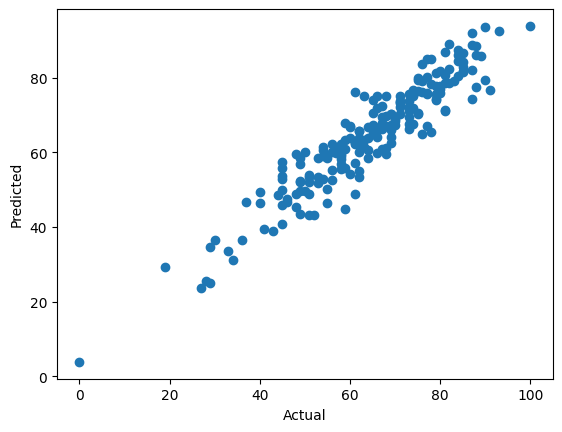

In [27]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")